In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [9]:
np.random.seed(15)
data = np.random.randint(-1,2, 30*4).reshape(30,4)
xs = np.c_[np.zeros([data.shape[0]]), data] 
xs[:5]

array([[ 0., -1.,  0., -1.,  0.],
       [ 0., -1., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  1.,  1., -1.,  0.],
       [ 0.,  0., -1.,  0., -1.]])

In [10]:
xs.shape

(30, 5)

In [11]:
ys = np.random.randint(0, 2, 30)
ys.resize(30,1)
ys[:6]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [20]:
def search_weights(xs, iterations, act_func, l_nodes, ys):
    c_weights = lambda ins, outs: np.random.randn(ins, outs)
    err = []
    for i in range(iterations):
        W = [c_weights(xs.shape[1], l_nodes[0])] + [c_weights(i, j) for i,j in zip(l_nodes, l_nodes[1:])]
        x = xs @ W[0]
        for i in range(len(W)-1):
            x = act_func(x)
            x = x @ W[i+1]
        yh = x
        e = yh - ys           
        e = np.sum(np.abs(e))
        if e < 0.05:
            print('we have converged after {} iterations'.format(i))
            print(ws)
            break
        err.append(e)
    return err

In [22]:
err = search_weights(xs,1000,np.sin,[6,10,5,2],ys)

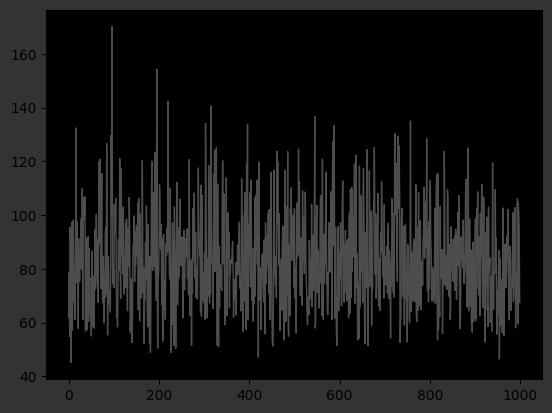

In [23]:
plt.axes().set_facecolor('black')
plt.plot(err,color='.3', linewidth=1)
plt.show()

In [10]:
np.set_printoptions(suppress=False, floatmode='fixed')

In [11]:
list_nodes = [3, 4, 7, 6, 8, 2, 1]
weights = lambda ins, outs: np.random.randn(ins, outs)
err = []
a=0
weights2 = []
weights2.append(weights(xs.shape[1], list_nodes[0]))
weights2

[array([[-0.44690176,  0.72790603,  0.07287717],
        [ 0.94882883,  1.33510710, -0.81062412],
        [ 0.88076203,  1.52027293, -0.42801795],
        [ 2.43851604, -1.69215198, -0.71539715],
        [-0.25017942,  0.30278026, -0.39678148]])]

In [12]:
Nodes = [weights(xs.shape[1], list_nodes[0])] + [weights(i, j) for i,j in zip(list_nodes, list_nodes[1:])]

In [13]:
[list_nodes[0]] + [(i,j) for i,j in zip(list_nodes, list_nodes[1:])]

[3, (3, 4), (4, 7), (7, 6), (6, 8), (8, 2), (2, 1)]

In [21]:
w1 = weights(5,6)

In [24]:
w2 = xs @ w1

In [25]:
w2.shape

(30, 6)